In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# install.packages('geojsonio')
# install.packages('RColorBrewer')
# install.packages('rgdal')

NULL


In [5]:
%%R

require('tidyverse')
library('ggbeeswarm')
library(geojsonio)
library(RColorBrewer)
library(rgdal)

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson

R[write to console]: 
Attaching package: ‘geojsonio’


R[write to console]: The following object is masked from ‘package:base’:

    pretty


R[write to console]: Loading required package: sp

R[write to console]: Please note that rgdal will be retired during 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.
See https://r-spatial.org/r/2022/04/12/evolution.html and https://github.com/r-spatial/evolution
rgdal: version: 1.6-4, (SVN revision 1196)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.4.2, released 2022/03/08
Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/4.2/Resources/library/rgdal/gdal
GDAL binary built with GEOS: FALSE 
Loaded PROJ runtime: Rel. 8.2.1, January 1st, 2022, [PJ_VERSION: 821]
Path to PROJ shared files: /Library/Frameworks/R.

In [6]:
import pandas as pd

## New York City GHG inventory

In [33]:
# This data is from New York City GHG Inventory.
# Link: 

nyc_ghg_df = pd.read_csv("NYC_GHG_Inventory.csv")

In [34]:
nyc_ghg_df.drop(nyc_ghg_df.columns[[6, 7, 8, 9]], axis=1, inplace=True)

In [35]:
# Rename columns

nyc_ghg_df.columns = ['sector', 'category', 'source', 'unit', 'consumed', 'tCo2e']

In [36]:
# Drop rows without values

nyc_ghg_df.drop([0, 1, 39], axis=0, inplace=True)

In [37]:
nyc_ghg_df.tail(10)

,sector,category,source,unit,consumed,tCo2e
29,Transportation,On-Road,Heavy duty trucks,VMT,539318720.8,1224872.0
30,Transportation,On-Road,Medium duty trucks,VMT,373618549.9,296682.0
31,Transportation,On-Road,Passenger cars,VMT,15683375517.0,9689447.0
32,Transportation,On-Road,SWCV,VMT,40651681.0,68528.0
33,Transportation,Railways,Diesel,gallon,1291342.37,13344.24134
34,Transportation,Railways,Electricity,kWh,1851196247.0,592807.8336
35,Waste,Biological treatment,CH4 and N2O from composting,MT,44652.295999999995,8550.914684000001
36,Waste,Landfills,CH4,MT,6423022.0,1960325.0
37,Waste,Wastewater treatment,CH4,MT,2645.062226,74061.74232
38,Waste,Wastewater treatment,N2O,MT,213.2144518,56501.82973


In [38]:
nyc_ghg_df.tCo2e = nyc_ghg_df.tCo2e.astype(float)

In [39]:
co2_by_category_df = pd.DataFrame(nyc_ghg_df.groupby(['sector', 'category'])['tCo2e'].sum().reset_index())

In [40]:
co2_by_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sector    11 non-null     object 
 1   category  11 non-null     object 
 2   tCo2e     11 non-null     float64
dtypes: float64(1), object(2)
memory usage: 392.0+ bytes


In [98]:
# Calculate share of each sector

by_sector = pd.DataFrame(co2_by_category_df.groupby('sector')['tCo2e'].sum())
by_sector.reset_index(inplace=True)
total_ghg = by_sector.tCo2e.sum()

In [103]:
by_sector['emission_pct'] = by_sector.tCo2e/total_ghg*100

In [104]:
by_sector

,sector,tCo2e,emission_pct
0,Stationary Energy,3.402440e+07,70.234453
1,Transportation,1.232019e+07,25.431805
2,Waste,2.099439e+06,4.333742


In [42]:
co2_by_category_df.to_csv('category_co2.csv', index=False)

In [21]:
%%R 

# install.packages("treemapify")
# install.packages("plotly")
library(treemapify)
library(ggplot2)
library(plotly)

In [43]:
%%R

df <- read.csv('category_co2.csv')

df

              sector                       category        tCo2e
1  Stationary Energy   Commercial and Institutional 13485292.082
2  Stationary Energy                       Fugitive   486842.312
3  Stationary Energy Manufacturing and Construction  4001339.954
4  Stationary Energy                    Residential 16050928.711
5     Transportation                       Aviation     1597.586
6     Transportation              Marine Navigation    53463.162
7     Transportation                        On-Road 11658979.491
8     Transportation                       Railways   606152.075
9              Waste           Biological treatment     8550.915
10             Waste                      Landfills  1960325.000
11             Waste           Wastewater treatment   130563.572


In [60]:
%%R -w 800 -h 500

# install.packages('treemap')
library(treemap)

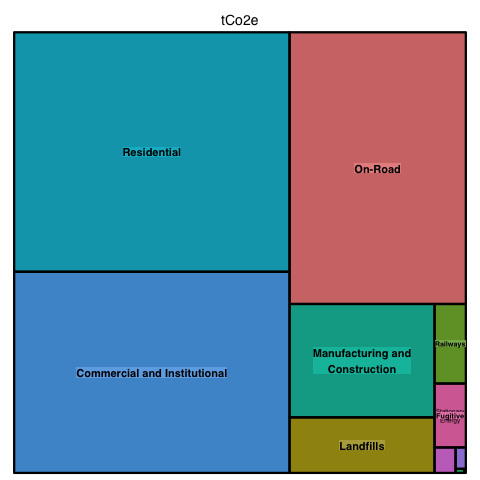

In [66]:
%%R

treemap(df, index=c("category","sector"), vSize="tCo2e", type="index",
 
#     fontsize.labels=c(15,12),                # size of labels. Give the size per level of aggregation: size for group, size for subgroup, sub-subgroups...
#     fontcolor.labels=c("white","orange"),    # Color of labels
#     fontface.labels=c(2,1),                  # Font of labels: 1,2,3,4 for normal, bold, italic, bold-italic...
#     bg.labels=c("transparent"),              # Background color of labels
#     align.labels=list(
#         c("center", "center"), 
#         c("right", "bottom")
#         ),                                   # Where to place labels in the rectangle?
#     overlap.labels=0.5,                      # number between 0 and 1 that determines the tolerance of the overlap between labels. 0 means that labels of lower levels are not printed if higher level labels overlap, 1  means that labels are always printed. In-between values, for instance the default value .5, means that lower level labels are printed if other labels do not overlap with more than .5  times their area size.
#     inflate.labels=F,                        # If true, labels are bigger when rectangle is bigger.
 
)

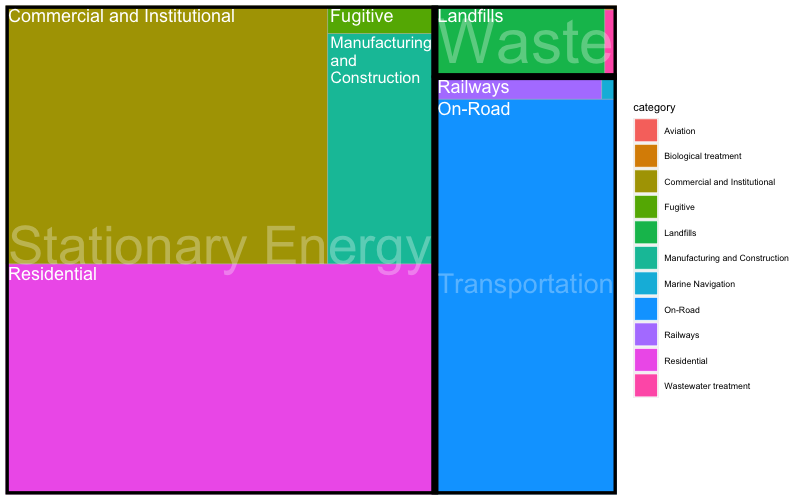

In [79]:
%%R -w 800 -h 500

ggplot(df) +
    aes(area=tCo2e, fill=category, subgroup=sector, label=category) +
    geom_treemap() +
    geom_treemap_subgroup_border(color='black', size=9) +
    geom_treemap_subgroup_text(place = "centre", grow = T, alpha = 0.3, colour =
                     "white", min.size = 0) +
    geom_treemap_text(colour = "white", place = "topleft", reflow = T)

In [ ]:
ggsave("nyc_ghg.pdf")